In [1]:
import numpy
import scipy.io

#carico file dati
tFft = 8192
percorsoDati = "/home/protoss/Documenti/TESI/DATI/dati9mesi52HWI.mat"
#percorsoDati = "/home/protoss/Documenti/TESI/DATI/datiOLDmesi52HWI.mat"

struttura = scipy.io.loadmat(percorsoDati)['job_pack_0']
tempi = struttura['peaks'][0,0][0]
frequenze = struttura['peaks'][0,0][1]
pesi = (struttura['peaks'][0,0][4]+1)


primoTempo = struttura['basic_info'][0,0]['tim0'][0,0][0,0]

nTempi = struttura['basic_info'][0,0]['ntim'][0,0][0,0]

tObs = (numpy.amax(tempi)-primoTempo)

tempi = tempi*60*60*24

print(tObs*60*60*24/4096, nTempi)

filtro = numpy.where(tempi[0:tempi.size-1]-tempi[1:tempi.size] != 0)
tempiUnici = numpy.append(tempi[filtro], tempi[tempi.size-1])

nTempiScience = tempiUnici.size
print(nTempiScience)
print(nTempiScience/nTempi)

diffTempi = numpy.round(numpy.diff(tempiUnici)/(tFft/2)).astype(numpy.int64)
saltiTempi = numpy.cumsum(diffTempi)

tempiReal = numpy.zeros(nTempi)

tempiReal[saltiTempi] = 1
lumiInt = numpy.cumsum(tempiReal)
lumiInt = lumiInt/nTempi
tempiReal = numpy.stack((tempiReal,tempiReal,tempiReal))



tfftPerMese = 30*24*60*60/(8192/2)
print(tfftPerMese)

5651.43310547 5652
3289
0.581917905166
632.8125


<IPython.core.display.Javascript object>


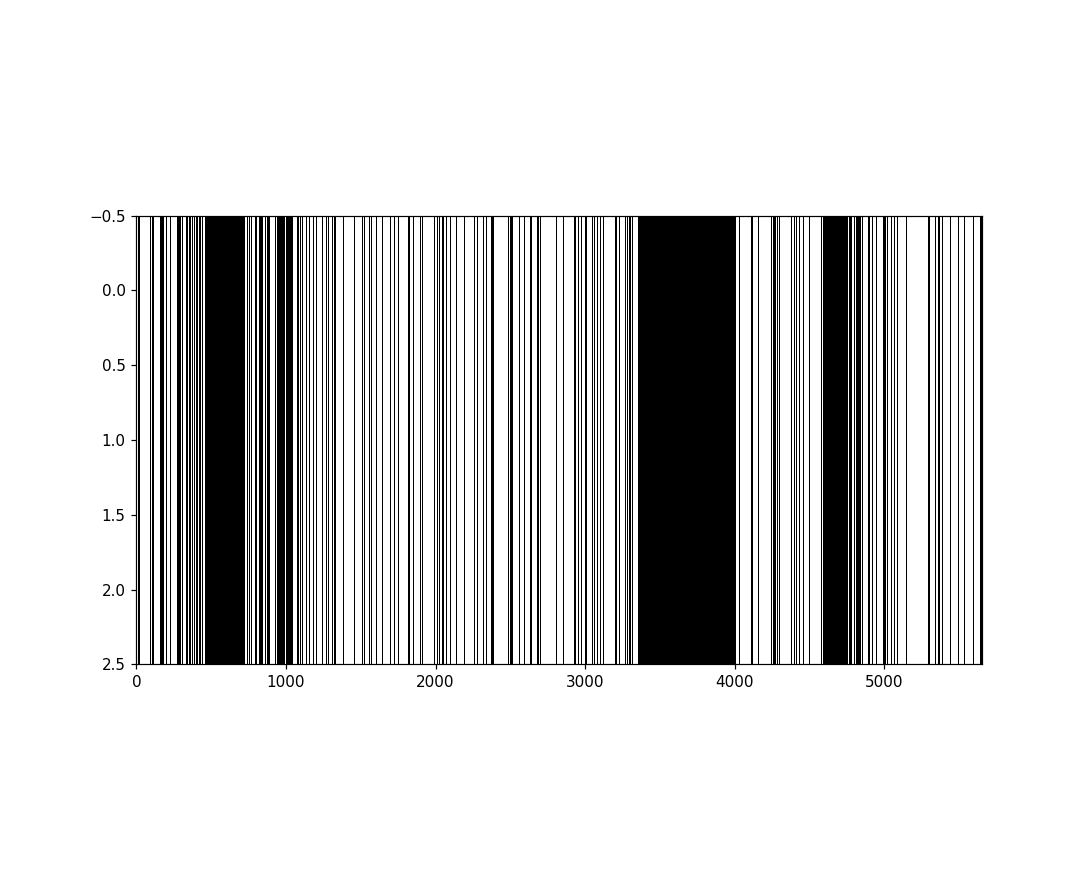

In [2]:
from matplotlib import pyplot
%matplotlib notebook
pyplot.figure(figsize=(10, 8))
a = pyplot.imshow(tempiReal, aspect=1000, cmap='gray')

<IPython.core.display.Javascript object>


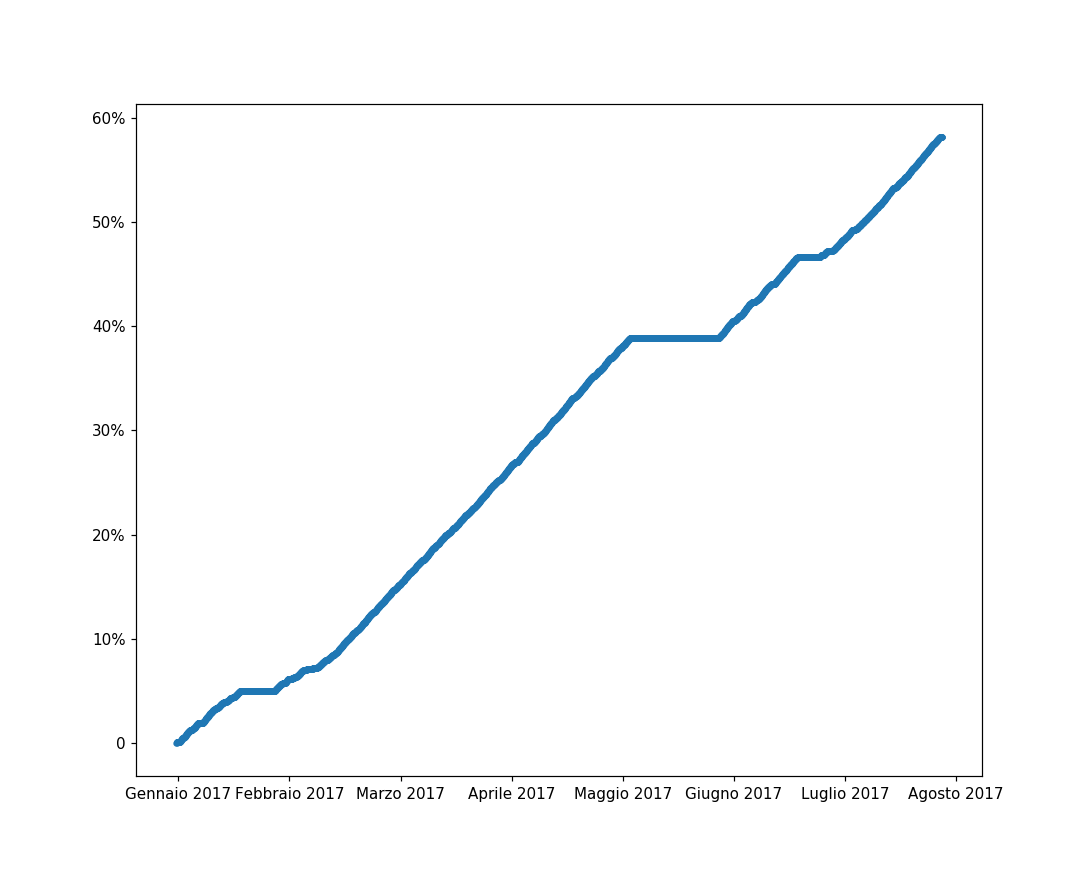

In [8]:
from matplotlib import pyplot
%matplotlib notebook
pyplot.figure(figsize=(10, 8))
posxTick = numpy.arange(8)*820+15
labelxTick = ["Gennaio 2017", "Febbraio 2017", "Marzo 2017", "Aprile 2017", "Maggio 2017", "Giugno 2017", "Luglio 2017", "Agosto 2017"]
pyplot.xticks(posxTick,labelxTick)


posyTick = numpy.arange(7)*0.1
labelyTick = ["0","10%", "20%", "30%", "40%", "50%", "60%", ]
pyplot.yticks(posyTick,labelyTick)

a = pyplot.scatter(numpy.arange(lumiInt.size),lumiInt, s = 10)